In [ ]:
# Аналитические цели: анализ ключевых показателей продаж лекарств и тенденций продаж лекарств на основе данных о продажах аптек

In [ ]:
# 1. Импортируйте и очистите данные

In [ ]:
# Pandas
# программная библиотека на языке Python для обработки и анализа данных. 
# Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами.
import pandas as pd

# NumPy
# (сокращенно от Numerical Python) — библиотека с открытым исходным кодом для языка программирования Python.
# Возможности: поддержка многомерных массивов (включая матрицы); поддержка высокоуровневых математических функций,
# предназначенных для работы с многомерными массивами.
import numpy as np

In [26]:
# Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# import pandas as pd

# Введите данные в форме объекта, чтобы сохранить исходную форму данных, а затем используйте astype()
# для преобразования формата данных
#sale_data = pd.read_excel ('C:/Users/Андрей/Downloads/2021-11-29_2021-12-16_searchquery_ayaweb7.xlsx', skiprows=4, dtype = 'object')

#sale_data

,Дата,Поисковый запрос,Кампания,№ Кампании,Группа,№ Группы,№ Объявления,Условие показа,Подобранная фраза,Площадка,...,CTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. позиция показов,Ср. позиция кликов,Отказы (%),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии
0,30.11.2021,где в архангельске можно заказать нарезку стекла,Спектр - Пиломатериалы - Поиск,67374988,Стекло,4748374403,M-11403351276,стекло -купить -матовое -продажа -рифленое,-,Яндекс,...,100,1.84,1.84,6,6,0,1,100,1.84,1
1,03.12.2021,имитация бруса купить,Спектр - Пиломатериалы - Поиск,67374988,Имитация,4748398667,M-11403427172,"""имитация бруса купить""",-,Яндекс,...,50,6.35,6.35,3,1,100,1,-,-,-
2,03.12.2021,купить половую доску,Спектр - Пиломатериалы - Поиск,67374988,Пол,4748388472,M-11403407720,"""половая доска купить""",-,Яндекс,...,100,3.08,3.08,8,8,0,1,100,3.08,1
3,03.12.2021,фанера коряжма,Спектр - Стройматериалы - Поиск,67782461,Фанера,4753622709,M-11425986766,фанера -купить -продажа,-,Яндекс,...,100,2.82,2.82,2,2,0,1,100,2.82,1
4,04.12.2021,компания триплекс 1 стекольная,Спектр - Стройматериалы - Поиск,67782461,Стекло,4753622708,M-11425986763,стекло -купить -матовое -продажа -рифленое,стекольный -купить -матовое -продажа -рифленое,Яндекс,...,100,0.4,0.4,7,7,0,1,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,15.12.2021,цветное стекло дисперсная система,Спектр - Стройматериалы - Поиск,67782461,Стекло,4753622708,M-11425986763,стекло -купить -матовое -продажа -рифленое,-,Яндекс,...,0,0,-,5,-,-,-,-,-,-
256,15.12.2021,цена укладки гипсокартона за квадратный метр н...,Спектр - Стройматериалы - Поиск,67782461,Гипсокартон,4755180200,M-11433418714,гипсокартон цена -лист,-,Яндекс,...,0,0,-,8,-,-,-,-,-,-
257,16.12.2021,киндер сюрприз коробка для мальчика из фанеры,Спектр - Стройматериалы - Поиск,67782461,Фанера,4753622709,M-11425986766,фанера -купить -продажа -коряжма,-,Яндекс,...,0,0,-,5,-,-,-,-,-,-
258,16.12.2021,купить сруб,Спектр - Услуги - Поиск,67512439,Срубы,4755488567,M-11434735497,"""купить сруб""",-,Яндекс,...,0,0,-,2,-,-,-,-,-,-


In [4]:
file_search = 'C:/Users/Андрей/Downloads/2021-11-29_2021-12-16_searchquery_ayaweb7.xlsx'

In [8]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$          FUNCTION SEARCH          $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Функция считывает файл, переименовывает колонки, считает суммы, сохраняет результат в новый файл.
def search_report(file_path):
    df = pd.read_excel(file_path, skiprows=4, dtype = 'object')
    df = df \
    .iloc[:, [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]] \
    .rename(columns={'Дата': 'date',
                    'Кампания': 'campaign',
                    'Группа': 'group',
                    '№ Объявления': 'number_ad',
                    'Условие показа': 'condition',
                    'Поисковый запрос': 'search_query',
                    'Подобранная фраза': 'phrase',
                    'Площадка': 'platform',
                    'Категория таргетинга': 'category',
                    'Показы': 'shows',
                    'Клики': 'click',
                    'CTR (%)': 'ctr',
                    'Расход (руб.)': 'expense',
                    'Ср. цена клика (руб.)': 'average_cost_click',
                    'Ср. позиция показов': 'average_position_show',
                    'Ср. позиция кликов': 'average_position_click',
                    'Отказы (%)': 'refusals',
                    'Глубина (стр.)': 'depth',
                    'Конверсия (%)': 'conversion_percent',
                    'Цена цели (руб.)': 'price',
                    'Конверсии': 'conversion'}) \
    .replace('-', 0)
    
    df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
#    df['condition'] = df['condition'].apply(lambda x: x.split(' -')[0])
#    df['condition'] = df['condition'].str.split(' -')[0]
    
    
    df['campaign'] = df['campaign'] \
    .replace('Спектр - Пиломатериалы - Поиск', 'Пиломатериалы') \
    .replace('Спектр - Стройматериалы - Поиск', 'Стройматериалы') \
    .replace('Спектр - Услуги - Поиск', 'Услуги') \
    .replace('Спектр - Лестницы - Поиск', 'Лестницы')
    
    
    
    return df

In [9]:
search = search_report(file_search)

In [10]:
search.head()

,date,search_query,campaign,group,number_ad,condition,phrase,platform,category,shows,...,ctr,expense,average_cost_click,average_position_show,average_position_click,refusals,depth,conversion_percent,price,conversion
0,30.11.2021,где в архангельске можно заказать нарезку стекла,Пиломатериалы,Стекло,M-11403351276,стекло,0,Яндекс,не определена,1,...,100,1.84,1.84,6.0,6,0,1,100,1.84,1
1,03.12.2021,имитация бруса купить,Пиломатериалы,Имитация,M-11403427172,"""имитация бруса купить""",0,Яндекс,Целевые запросы,2,...,50,6.35,6.35,3.0,1,100,1,0,0.00,0
2,03.12.2021,купить половую доску,Пиломатериалы,Пол,M-11403407720,"""половая доска купить""",0,Яндекс,Целевые запросы,1,...,100,3.08,3.08,8.0,8,0,1,100,3.08,1
3,03.12.2021,фанера коряжма,Стройматериалы,Фанера,M-11425986766,фанера,0,Яндекс,Целевые запросы,1,...,100,2.82,2.82,2.0,2,0,1,100,2.82,1
4,04.12.2021,компания триплекс 1 стекольная,Стройматериалы,Стекло,M-11425986763,стекло,стекольный -купить -матовое -продажа -рифленое,Яндекс,не определена,1,...,100,0.40,0.40,7.0,7,0,1,0,0.00,0


In [18]:
# TABLE_1: Общее количество кликов по рекламе для каждой группы
group_active = search.groupby('group', as_index=False) \
    .agg({'click': 'sum'}) \
    .rename(columns={'click': 'sum_click'})# \

group_active.head()

,group,sum_click
0,Брус,0
1,Вагонка,1
2,Гипсокартон,0
3,Заборы,0
4,Имитация,2


In [19]:
# TABLE_2: Общее количество показов рекламы для каждой группы # с числом показов >= 1
group_popular = search.groupby('group', as_index=False) \
    .agg({'shows': 'sum'}) \
    .rename(columns={'shows': 'sum_shows'})# \
#    .query('count_shows > 1')

group_popular.head()

,group,sum_shows
0,Брус,6
1,Вагонка,9
2,Гипсокартон,13
3,Заборы,1
4,Имитация,9


In [20]:
# TABLE_3: Количество популярных запросов ПО ПОПУЛЯРНЫМ ГРУППАМ ОБЪЯВЛЕНИЙ - "SEARCH"
lovely_query = search.groupby('group', as_index=False) \
    .agg({'search_query': pd.Series.nunique}) \
    .rename(columns={'search_query': 'unique_query'})# \

#lovely_query = search.query("group == 'Фанера'").search_query.unique()

lovely_query.head()

,group,unique_query
0,Брус,5
1,Вагонка,7
2,Гипсокартон,11
3,Заборы,1
4,Имитация,7


In [22]:
# TABLE_4: Количество показов рекламы ПО ПОПУЛЯРНЫМ ЗАПРОСАМ
lovely_query_count = search.groupby(['group', 'search_query'], as_index=False) \
    .agg({'shows': 'count'}) \
    .sort_values(['shows', 'group'], ascending=[False, True]) \
    .groupby('group') \
    .head(1) \
    .rename(columns={'search_query': 'popular_query','shows': 'count_popular_shows'})

lovely_query_count.head()

,group,popular_query,count_popular_shows
74,Стекло,где в архангельске можно заказать нарезку стекла,3
2,Брус,купить проект бани из бруса,2
9,Вагонка,купить вагонку в архангельской области устьянс...,2
14,Гипсокартон,гипсокартон цена,2
32,Наличник,наличники на окна в деревянном доме увеличиваю...,2


In [23]:
# Объединяем ЧЕТЫРЕ таблички: "lovely_query_count", "lovely_query", "group_popular" и  "group_active"
# в одну для дальнейшего анализа.
popular_query = group_popular \
    .merge(group_active, on='group', how='inner') \
    .merge(lovely_query, on='group', how='inner') \
    .merge(lovely_query_count, on='group', how='inner')

In [24]:
popular_query.sort_values('unique_query', ascending = False)

,group,sum_shows,sum_click,unique_query,popular_query,count_popular_shows
12,Стекло,100,2,89,где в архангельске можно заказать нарезку стекла,3
13,Стройматериалы,55,2,48,сеть магазинов петрович архангельской области,2
15,Фанера,41,3,36,купить фанеру в савинском плесецкого района ар...,2
2,Гипсокартон,13,0,11,гипсокартон цена,2
6,Пиломатериалы,11,1,9,закупаю доску обрезную,1
11,Срубы,8,0,8,браширование сруба из бревна,1
1,Вагонка,9,1,7,купить вагонку в архангельской области устьянс...,2
4,Имитация,9,2,7,имитация бруса купить,1
0,Брус,6,0,5,купить проект бани из бруса,2
14,Услуги,6,2,5,предложение строительных услуг,1


In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!          VIZUALIZATION          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

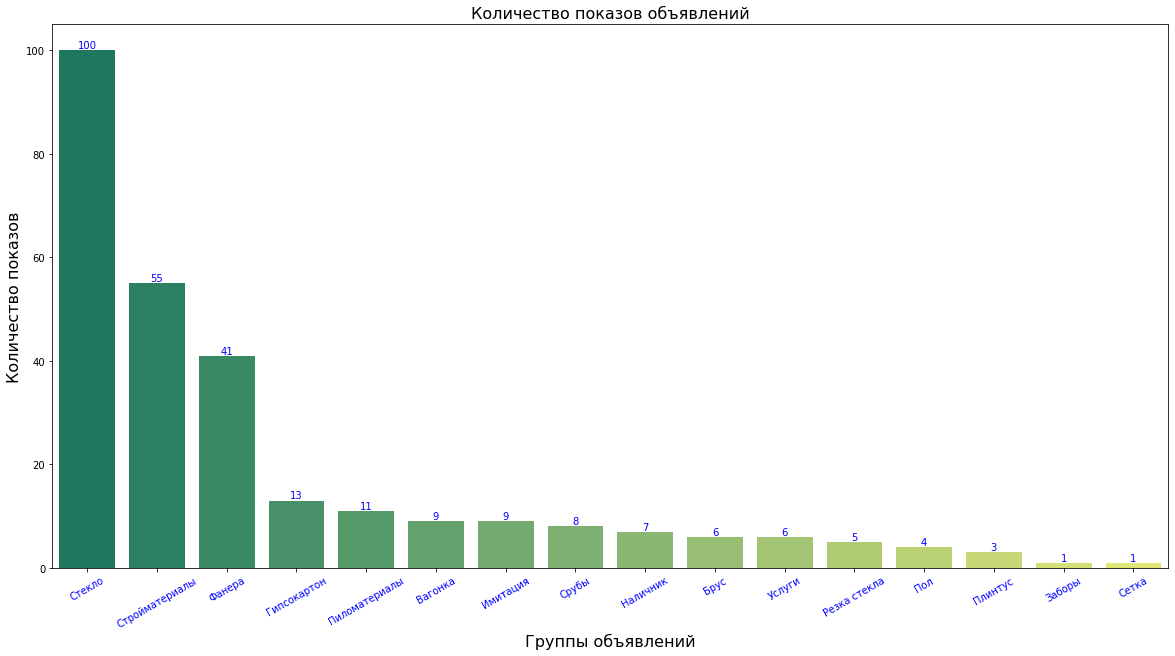

In [27]:
# Гистограмма 'Количество показов объявлений'
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество показов объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            palette='summer')
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows.set_ylabel('Количество показов', fontsize=16)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_shows.patches:
             ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

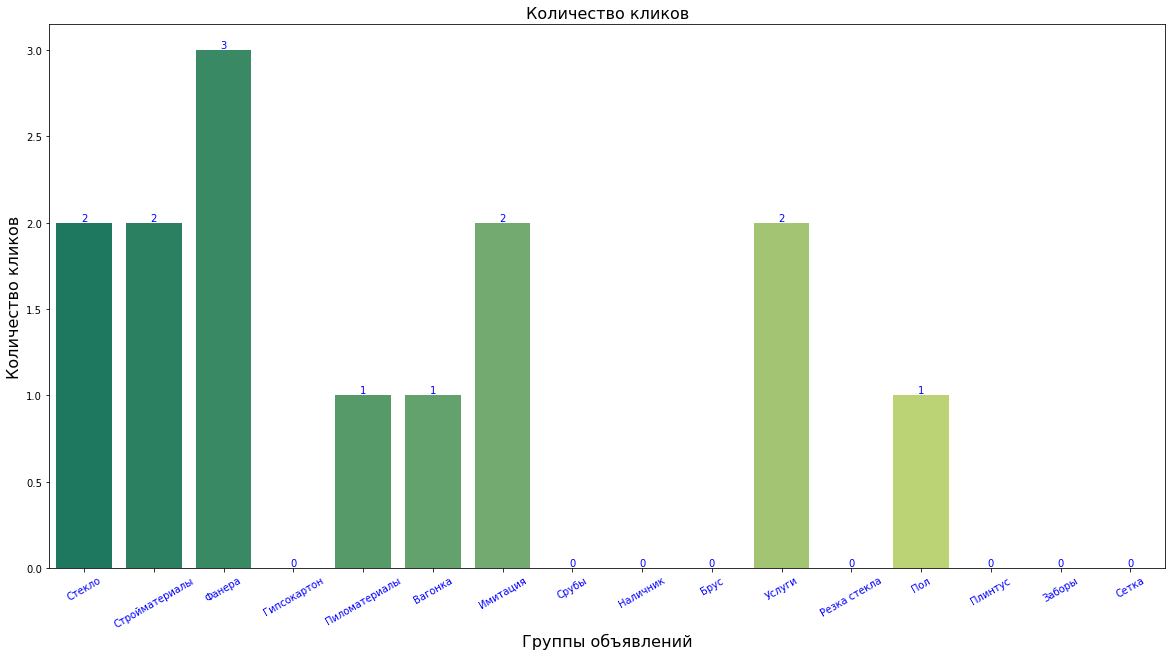

In [28]:
# Гистограмма 'Количество кликов'
popular_query = popular_query.sort_values('sum_shows', ascending=False)
plt.figure(figsize=(20, 10))
plt.title('Количество кликов', fontsize=16)
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            palette='summer')
ax_click.set_xlabel('Группы объявлений', fontsize=16)
ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.set_xticklabels(popular_query.group,
                  fontsize = 10, # horizontal
                   color = 'b',    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='b', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

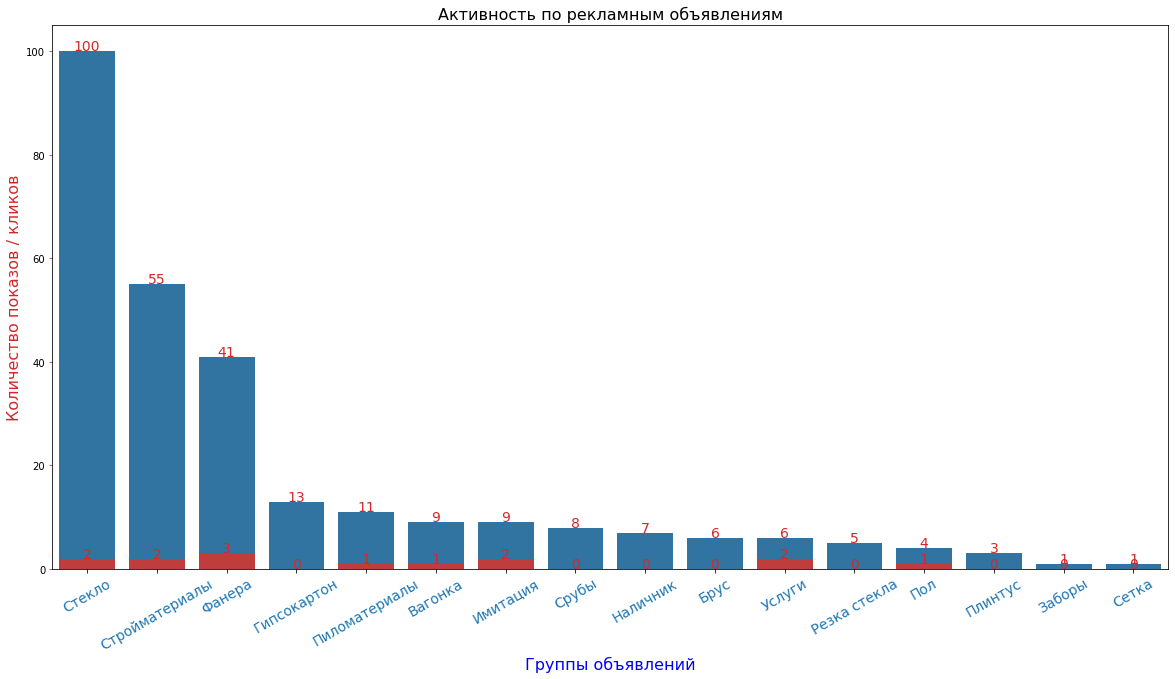

In [29]:
# Нарисуйте базовый слой
popular_query = popular_query.sort_values('sum_shows', ascending=False)
fig, ax_shows = plt.subplots(figsize=(20,10))
#plt.figure(figsize=(20, 10))
ax_shows.set_title('Активность по рекламным объявлениям', fontsize=16)

# Первая гистограмма
color = 'tab:blue'
ax_shows.set_xlabel('Группы объявлений', fontsize=16)
ax_shows=sns.barplot(x='group', 
            y='sum_shows', 
            data=popular_query, 
            color=color)
ax_shows.set_ylabel('Количество показов', fontsize=16, color=color)
ax_shows.set_xticklabels(popular_query.group,
                  fontsize = 14, # horizontal
                   color=color,    #  Цвет текста
                   rotation = 30,    #  Поворот текста
                   verticalalignment =  'top')    #  Вертикальное выравнивание
ax_shows.tick_params(axis='y')
 #twinxShare x-axis (Схожий синтаксис, например совместное использование оси y twiny)
#ax_click = ax_shows.twinx()

# annotation here
# for p in ax_shows.patches:
#              ax_shows.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
#                  ha='center', va='center', fontsize=14, color=color, xytext=(0, 5),
#                  textcoords='offset points')


# Вторая гистограмма
color = 'tab:red'
ax_click=sns.barplot(x='group', 
            y='sum_click', 
            data=popular_query, 
            color=color)
ax_click.set_ylabel('Количество показов / кликов', fontsize=16, color=color)
ax_click.set_xlabel('Группы объявлений', fontsize=16, color='blue')
# ax_click.set_ylabel('Количество кликов', fontsize=16)
ax_click.tick_params(axis='y', color=color)

# annotation here
for p in ax_click.patches:
             ax_click.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color=color, xytext=(0, 5),
                 textcoords='offset points')

# Отображение результатов рисования
plt.show()

# ax_shows = sns.barplot(x = 'group', y = 'sum_shows', data = popular_query, color = 'red')
# ax_click = sns.barplot(x = 'group', y = 'sum_click', data = popular_query, color = 'blue')

In [ ]:
# 1. Сброс названия столбца: изменение времени покупки лекарства на время продажи
 dfrename = {"время покупки": "время продажи"}
sale_data.rename(columns=dfrename,inplace=True)
 
 # 2. Обработка пропущенных значений
 # Найти пропущенные значения
sale_data.isnull().sum()
 
 # Удалить пропущенные значения
 sale_df = sale_data.dropna (subset = ['Время продажи', 'Номер карты социального обеспечения'], how = 'any', axis = 0)
sale_df.shape
 
 # Необходимо сбросить индекс после удаления отсутствующего значения, добавить drop = True, чтобы удалить исходный индекс, в противном случае исходный индекс будет сохранен как столбец с именем столбца индекса
sale_df=sale_df.reset_index(drop=True)
 
 # 3. Извлечение данных и преобразование формата данных
 # Преобразовать объем продаж, сумму к получению, фактическую полученную сумму в число с плавающей запятой
 sale_df ['Количество продажи'] = sale_df ['Количество продажи']. astype ('float')
 sale_df ['Сумма к получению'] = sale_df ['Сумма к получению']. astype ('float')
 sale_df ['Фактическая сумма'] = sale_df ['Фактическая сумма']. astype ('float')
sale_df.dtypes
 
 # 4. Обработка данных даты
 # Извлечь время продажи
 date = pd.DataFrame (sale_df ['время продажи']. apply (лямбда-ы: s.split ("")). values.tolist (), columns = ['date', 'day']])
 # Преобразовать тип объекта даты в тип даты
 # Добавить ошибки = 'Принуждение', если исходные данные не соответствуют формату даты, преобразованное значение равно нулю NaT
 date ['date'] = pd.to_datetime (date ['date'], формат = '% Y-% m-% d', ошибки = 'принудительно')
sale_df1 = sale_df
 sale_df1 ['Дата продажи'] = дата ['Дата']
 sale_df1 ['Sale Week'] = дата ['Week']
 
 # При преобразовании формата даты те, которые не соответствуют формату даты, будут преобразованы в нулевые значения, а строки с нулевым значением будут удалены
 sale_df1 = sale_df1.dropna (subset = ['Date Sale'], how = 'any')
 # Сбросить индекс
sale_df1=sale_df1.reset_index(drop=True)
 
 # 5. Сортировать по дате
 sale_df1 = sale_df1.sort_values ​​(by = 'Дата продажи', по возрастанию = True)
 # Сбросить индекс
sale_df1=sale_df1.reset_index(drop=True)
 
 # 6. Обработка выбросов
 # Проверка на выбросы
sale_df1.describe()
 # «Объем продаж», «Сумма» Минимальное значение не может быть ниже 0
 печать («Перед удалением выбросов:», sale_df1.shape)
 querySer = sale_df1.loc [:, 'Количество продаж']> 0
sale_df2 = sale_df1.loc[querySer,:]
 печать («После удаления выбросов:», sale_df2.shape)

In [ ]:
# 2. Анализ данных
# а) Рассчитать ключевые показатели: среднее количество месячных расходов,
#     среднемесячная сумма потребления и цена за единицу клиента

In [ ]:
'''
 Бизнес-показатель 1: среднемесячное время потребления = среднее месячное время потребления
 Условие: все покупки, сделанные в один и тот же день одним и тем же лицом, рассматриваются один раз
 Метод: Если «Дата продажи» и «Номер карты социального обеспечения» совпадают, будет сохранен только один счет
'''
kpi1 = sale_df2.drop_duplicates (subset = ['Дата продажи', 'Номер карты социального обеспечения'])
 # Сортировать в хронологическом порядке
 kpi1 = kpi1.sort_values ​​(by = 'Дата продажи', по возрастанию = True)
 # Сбросить индекс
kpi1=kpi1.reset_index(drop=True)
kpi1.shape
 
 kpi1 ['Количество потребления'] = 1
kpi = kpi1
 kpi.index = kpi ['Дата продажи']
 
 # Подсчет ежемесячных данных о потреблении с групповым
gb=kpi.groupby(kpi.index.month)
MonSales=gb.sum()
 
 
 # Среднемесячные расходы kpi_1
 kpi_1 = MonSales ['Количество потребления']. loc [: 6] .mean ()
 
 # Среднемесячная сумма продаж kpi_2
 kpi_2 = MonSales ['Приобретенная сумма']. loc [: 6] .mean ()
 
 # Цена единицы товара kpi_3
 kpi_3 = MonSales ['Приобретенная сумма']. sum () / MonSales ['Количество покупок']. sum ()

In [ ]:
# б) сравнить потребление каждого периода:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
 
# Сравнение месячного потребления
f,ax1 = plt.subplots()
 MonSales.plot (x = MonSales.index, y = ['Количество потребления'), ax = ax1)
 MonSales.plot (x = MonSales.index, y = ['Заплаченная сумма'], ax = ax1, second_y = True)
 
 # Еженедельная обработка данных
kpi2 = kpi1
 gb2 = kpi2.groupby (by = 'Sales Week')
WeekSales=gb2.sum()
WeekSales.index=[1,3,2,5,6,4,7]
WeekSales.sort_index(inplace = True)
 
 # Еженедельное сравнение потребления
f,ax2 = plt.subplots()
 WeekSales.plot (x = WeekSales.index, y = «Количество потребления», ax = ax2)
 WeekSales.plot (x = WeekSales.index, y = «Сумма платежа», ax = ax2, second_y = True)

In [ ]:
# Из рисунка выше мы видим:

# 1. При сравнении месячных продаж объем продаж аптек в феврале значительно снизился по сравнению с другими месяцами
# (данные за июль - только 19 июля, поэтому общее сравнение не проводится).
# Объем продаж аптек в апреле, мае и июне составил 38 000. выше.

# 2. При сравнении продаж по месяцам количество покупок в апреле было наибольшим,
# но фактическая полученная сумма была не самой высокой, что указывает на то,
# что единичное потребление на одного покупателя было ниже, чем в июне.

# 3. В еженедельном сравнении продаж общая тенденция количества потребления и количества потребления является постоянной,
# и пятница - это наибольшее количество потребления и количество потребления в течение недели и дважды в субботу.
# В четверг расходы были минимальными.

In [ ]:
# в) статистика продаж лекарств

# Диаграмма Парето

In [ ]:
# Сортируйте количество продаж в соответствии с названием продукта группы продаж и выберите Top10
 gb3 = pd.DataFrame (sale_df2.groupby (['Название продукта']). sum () ['Количество продаж'])
 SaleQuantity = gb3.sort_values ​​(by = 'Объем продаж', по возрастанию = False)
 
 TotalSales = SaleQuantity ['Количество продажи']. Sum ()
 
 # Рассчитать процент
 SaleQuantity ['Percentage'] = SaleQuantity ['Объем продаж'] / TotalSales
SaleQuantity['AcmPerc'] = -1
 
 # Рассчитать совокупный процент  
for i in range(len(SaleQuantity.index)):
    if i == 0:
        SaleQuantity['AcmPerc'].iloc[0]=SaleQuantity['Percentage'].iloc[0]
    else:
        SaleQuantity['AcmPerc'].iloc[i]=SaleQuantity['Percentage'].iloc[i]+SaleQuantity['AcmPerc'].iloc[i-1]
Top_Sales=SaleQuantity[:10]
 
f,ax3=plt.subplots()
 Top_Sales.plot (x = Top_Sales.index, y = «Количество продаж», ax = ax3, kind = «bar», title = «Лучшие десять продаж», grid = True, гниль = 70)
ax4 = ax3.twinx()
Top_Sales.plot(x=Top_Sales.index,y='AcmPerc',kind='line',ax=ax4,secondary_y=True,marker='o',rot=70)
for a,b in zip(range(10),Top_Sales['AcmPerc']):
    plt.text(a,b,'%.2f%%'%(b*100),ha='center',va='bottom')
ax3.legend(loc='upper center')

In [ ]:
# Десять лучших лекарств показаны на рисунке выше, а на первые десять лекарств приходится 52% от общего объема продаж.

# Принимая во внимание приведенные выше данные, все еще можно проанализировать множество вещей, например,
# то, приобретается ли определенное лекарство в определенный период времени,
# какие лекарства обычно покупаются в больших масштабах и какие лекарства продаются очень мало в прошлом году,
# что может соответствующим образом сократить закупки.
# Сумма должна быть проанализирована в соответствии с конкретными потребностями, и она не будет повторяться здесь.